#  Importando librerias

In [1]:
from spectral import *
import spectral.io.envi as envi
import cv
import numpy as np 
import time
import scipy.fftpack
import math
import spectral.io.aviris as aviris
import matplotlib.pyplot as plt

# Leer una imagen hiperespectral extención .bil.hdr

Leyendo una imagen hiperespectral
El factor de reflectancia es 4095.0
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240


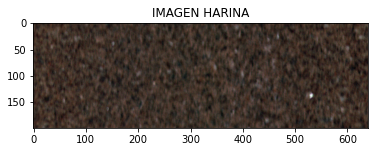

In [5]:
#Cargando una imagen espectral
def hyper_image(img):
    
    print("Leyendo una imagen hiperespectral")
    #img = open_image(file).load()
    img = envi.open(file)
    
    view = imshow(img,(120, 60, 40))
    plt.title('IMAGEN HARINA')

    reflactance_scale_factor = img.scale_factor
    print("El factor de reflectancia es",reflactance_scale_factor)

    archivo = open(file) 
    l=archivo.read()
    #print(l)

    nlines = int(l[45:48])
    nsamples = int(l[59:62])
    nbands = int(l[71:74])
    
    print("El numero de lineas es", nlines)
    print("El numero de samples es", nsamples)
    print("El numero de bandas es", nbands)
    
    return (img, nlines, nsamples, nbands)
    



file = 'C011180100.bil.hdr'
[img, nlines,nsamples, nbands] = hyper_image(file)

#print(nlines)

# Obtener la firma espectral del cubo

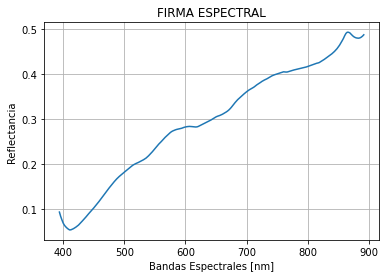

In [6]:
#Graficando la firma espectral

def spectral(img):
    bands2 = img.bands.centers  #bandas espctrales
    plt.figure ()
    #imshow(img.read_band(50))
    #plt.plot(img.read_pixel(10,10))
    
    espec = 0
    Area = nlines*nsamples
    for i in range(nlines):
        for j in range(nsamples):
            #plt.plot(img.read_pixel(i,j))
            espec = espec + img.read_pixel(i,j)
    espec = espec/(Area)

    return (espec, bands2)

[espec, bands] = spectral(img)
plt.plot(bands,espec)
plt.title('FIRMA ESPECTRAL')
plt.ylabel('Reflectancia')
plt.xlabel('Bandas Espectrales [nm]')
plt.grid()

# Calculo de un Indice Espectral

El indice espectral NDVI promedio es 0.31754771888522565


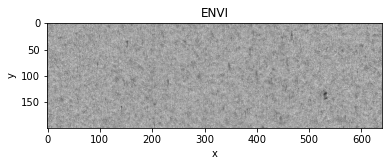

In [7]:
def spectral_index(img):
    #Calculando un Indice Espectral NDVI
    red = img.read_band(21)
    nir = img.read_band(43)
    vi = (nir - red)/(nir + red)
    v = imshow(vi)
    plt.title('ENVI')
    plt.ylabel('y')
    plt.xlabel('x')

    indx = 0
    Area = nlines*nsamples
    for i in range(nlines):
        for j in range(nsamples):
            indx = indx + vi[i,j]
    
    indx = indx/Area

    return (indx)
    
    
index = spectral_index(img)

print("El indice espectral NDVI promedio es", index)

# Guardando dato archivo Excel

In [8]:
import openpyxl

espe = [tuple(espec)]
encabezado = []
wb = openpyxl.Workbook()
hoja = wb.active

# Crea la fila del encabezado con los títulos
for i in bands:
    encabezado.append(str(i))
hoja.append(encabezado)

for data in espe:
    hoja.append(data)
    
wb.save('Data.xlsx')


# Calcular Indice Espectral ENVI

In [ ]:
def spectral_index_1(self):
    red = 21
    nir = 43
    ie = ndvi(img, red, nir)
    imshow(ie)
    plt.title('ENVI')
    plt.ylabel('y')
    plt.xlabel('x')
    
spectral_index_1(img)

# Creando Cluster

In [ ]:
#Graficando la firma espectral

def spectral_0(img):
    bands2 = img.bands.centers  #bandas espctrales
    #print("bandas")
    #print (bands2)
    (m, c) = kmeans(img, 4, 5)
    #m = resolucion espacial 200x640
    #c = valores de reflectancia, 240 bandas
    plt.figure()
    for i in range(c.shape[0]):
        plt.plot(bands2,c[i])
    plt.title('FIRMA ESPECTRAL')
    plt.ylabel('Reflectancia')
    plt.xlabel('Bandas Espectrales [nm]')
    plt.grid()
    
spectral_0(img)